In [1]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from numpy import asarray
import numpy as np
import pandas as pd
import glob
import os

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Embedding, Flatten, Conv1D, GlobalMaxPooling1D
from keras import optimizers


from keras.preprocessing.text import Tokenizer
import matplotlib.pyplot as plt


from keras_preprocessing.sequence import pad_sequences

from keras import initializers
from keras.regularizers import l1


In [2]:
#load data for processing
mydatadir = 'FullData'

datafiles = glob.glob(os.path.join(mydatadir, '*.xlsx'))
data_raw = pd.read_excel(rf'Final_full_cleaned_dataset.xlsx')

In [3]:
#split year-month feature into 2 seperate featurs
data_raw['year'] = data_raw['year_month'].dt.year
data_raw['month'] = data_raw['year_month'].dt.month

Seperate the provinces data by month and add columns for standard deviation and mean for n_raining days and dengue cases

In [4]:
dataframes = []  # a list to hold all the individual pandas DataFrames
data_list_Jan = []
data_list_Feb = []
data_list_Mar = []
data_list_Apr = []
data_list_May = []
data_list_Jun = []
data_list_Jul = []
data_list_Aug = []
data_list_Sep = []
data_list_Oct = []
data_list_Nov = []
data_list_Dec = []

for datafile in datafiles:
    df = pd.read_excel(datafile)
    df['month'] = df['year_month'].dt.month
    province = datafile.split("\\")
    province = province[1].split(".")
    data_list_Jan.append([province[0], df.loc[df['month']==1, 'n_raining_days'].mean(), df.loc[df['month']==1,'n_raining_days'].std(), df.loc[df['month']==1,'Dengue_fever_cases'].mean(), df.loc[df['month']==1,'Dengue_fever_cases'].std()])
    data_list_Feb.append([province[0], df.loc[df['month']==2, 'n_raining_days'].mean(), df.loc[df['month']==2,'n_raining_days'].std(), df.loc[df['month']==2,'Dengue_fever_cases'].mean(), df.loc[df['month']==2,'Dengue_fever_cases'].std()])
    data_list_Mar.append([province[0], df.loc[df['month']==3, 'n_raining_days'].mean(), df.loc[df['month']==3,'n_raining_days'].std(), df.loc[df['month']==3,'Dengue_fever_cases'].mean(), df.loc[df['month']==3,'Dengue_fever_cases'].std()])
    data_list_Apr.append([province[0], df.loc[df['month']==4, 'n_raining_days'].mean(), df.loc[df['month']==4,'n_raining_days'].std(), df.loc[df['month']==4,'Dengue_fever_cases'].mean(), df.loc[df['month']==4,'Dengue_fever_cases'].std()])
    data_list_May.append([province[0], df.loc[df['month']==5, 'n_raining_days'].mean(), df.loc[df['month']==5,'n_raining_days'].std(), df.loc[df['month']==5,'Dengue_fever_cases'].mean(), df.loc[df['month']==5,'Dengue_fever_cases'].std()])
    data_list_Jun.append([province[0], df.loc[df['month']==6, 'n_raining_days'].mean(), df.loc[df['month']==6,'n_raining_days'].std(), df.loc[df['month']==6,'Dengue_fever_cases'].mean(), df.loc[df['month']==6,'Dengue_fever_cases'].std()])
    data_list_Jul.append([province[0], df.loc[df['month']==7, 'n_raining_days'].mean(), df.loc[df['month']==7,'n_raining_days'].std(), df.loc[df['month']==7,'Dengue_fever_cases'].mean(), df.loc[df['month']==7,'Dengue_fever_cases'].std()])
    data_list_Aug.append([province[0], df.loc[df['month']==8, 'n_raining_days'].mean(), df.loc[df['month']==8,'n_raining_days'].std(), df.loc[df['month']==8,'Dengue_fever_cases'].mean(), df.loc[df['month']==8,'Dengue_fever_cases'].std()])
    data_list_Sep.append([province[0], df.loc[df['month']==9, 'n_raining_days'].mean(), df.loc[df['month']==9,'n_raining_days'].std(), df.loc[df['month']==9,'Dengue_fever_cases'].mean(), df.loc[df['month']==9,'Dengue_fever_cases'].std()])
    data_list_Oct.append([province[0], df.loc[df['month']==10, 'n_raining_days'].mean(), df.loc[df['month']==10,'n_raining_days'].std(), df.loc[df['month']==10,'Dengue_fever_cases'].mean(), df.loc[df['month']==10,'Dengue_fever_cases'].std()])
    data_list_Nov.append([province[0], df.loc[df['month']==11, 'n_raining_days'].mean(), df.loc[df['month']==11,'n_raining_days'].std(), df.loc[df['month']==11,'Dengue_fever_cases'].mean(), df.loc[df['month']==11,'Dengue_fever_cases'].std()])
    data_list_Dec.append([province[0], df.loc[df['month']==12, 'n_raining_days'].mean(), df.loc[df['month']==12,'n_raining_days'].std(), df.loc[df['month']==12,'Dengue_fever_cases'].mean(), df.loc[df['month']==12,'Dengue_fever_cases'].std()])

In [5]:
dataForProvincesJan = pd.DataFrame(data_list_Jan, columns=['Province', 'Mean Raining Days', 'Standard Deviation of Raining Days', 'Mean Dengue Fever Cases', 'Standard Deviation of Dengue Fever Cases'])
dataForProvincesFeb = pd.DataFrame(data_list_Feb, columns=['Province', 'Mean Raining Days', 'Standard Deviation of Raining Days', 'Mean Dengue Fever Cases', 'Standard Deviation of Dengue Fever Cases'])
dataForProvincesMar = pd.DataFrame(data_list_Mar, columns=['Province', 'Mean Raining Days', 'Standard Deviation of Raining Days', 'Mean Dengue Fever Cases', 'Standard Deviation of Dengue Fever Cases'])
dataForProvincesApr = pd.DataFrame(data_list_Apr, columns=['Province', 'Mean Raining Days', 'Standard Deviation of Raining Days', 'Mean Dengue Fever Cases', 'Standard Deviation of Dengue Fever Cases'])
dataForProvincesMay = pd.DataFrame(data_list_May, columns=['Province', 'Mean Raining Days', 'Standard Deviation of Raining Days', 'Mean Dengue Fever Cases', 'Standard Deviation of Dengue Fever Cases'])
dataForProvincesJun = pd.DataFrame(data_list_Jun, columns=['Province', 'Mean Raining Days', 'Standard Deviation of Raining Days', 'Mean Dengue Fever Cases', 'Standard Deviation of Dengue Fever Cases'])
dataForProvincesJul = pd.DataFrame(data_list_Jul, columns=['Province', 'Mean Raining Days', 'Standard Deviation of Raining Days', 'Mean Dengue Fever Cases', 'Standard Deviation of Dengue Fever Cases'])
dataForProvincesAug = pd.DataFrame(data_list_Aug, columns=['Province', 'Mean Raining Days', 'Standard Deviation of Raining Days', 'Mean Dengue Fever Cases', 'Standard Deviation of Dengue Fever Cases'])
dataForProvincesSep = pd.DataFrame(data_list_Sep, columns=['Province', 'Mean Raining Days', 'Standard Deviation of Raining Days', 'Mean Dengue Fever Cases', 'Standard Deviation of Dengue Fever Cases'])
dataForProvincesOct = pd.DataFrame(data_list_Oct, columns=['Province', 'Mean Raining Days', 'Standard Deviation of Raining Days', 'Mean Dengue Fever Cases', 'Standard Deviation of Dengue Fever Cases'])
dataForProvincesNov = pd.DataFrame(data_list_Nov, columns=['Province', 'Mean Raining Days', 'Standard Deviation of Raining Days', 'Mean Dengue Fever Cases', 'Standard Deviation of Dengue Fever Cases'])
dataForProvincesDec = pd.DataFrame(data_list_Dec, columns=['Province', 'Mean Raining Days', 'Standard Deviation of Raining Days', 'Mean Dengue Fever Cases', 'Standard Deviation of Dengue Fever Cases'])


In [6]:
#give temporary labels to all records
data_raw['dengue outbreak in 1 month'] = 0
data_raw['dengue outbreak in 2 months'] = 0
data_raw['dengue outbreak in 3 months'] = 0
data_raw['dengue outbreak in 4 months'] = 0
data_raw['dengue outbreak in 5 months'] = 0
data_raw['dengue outbreak in 6 months'] = 0

In [ ]:
months = [dataForProvincesJan,dataForProvincesFeb,dataForProvincesMar,dataForProvincesApr,dataForProvincesMay,dataForProvincesJun,dataForProvincesJul,dataForProvincesAug,dataForProvincesSep,dataForProvincesOct,dataForProvincesNov,dataForProvincesDec]

set real labels for data by comparing dengue cases in t timeframe with the standard deviation for that month

In [ ]:
for i in range(len(months)):
    temp = i
    for j in range(len(data_raw['Dengue_fever_cases'])-330):
        for k in range(len(months[i]['Province'])):
            if data_raw['province'][j]==months[i]['Province'][k]:
                if data_raw['month'][j]==i+1:
                    if i+1>=12:
                        temp = i-12 #to out of bounds error
                    #use j+55 as there are 55 provinces so each increment of 55 is the next month for that province
                    if data_raw['Dengue_fever_cases'][j+55]>months[temp+1]['Standard Deviation of Dengue Fever Cases'][k]:
                        data_raw['dengue outbreak in 1 month'][j]=1
                    else:
                        data_raw['dengue outbreak in 1 month'][j]=0

                    if i+2>=12:
                        temp = i-12#to out of bounds error
                    #+110 is 2 months
                    if data_raw['Dengue_fever_cases'][j+110]>months[temp+2]['Standard Deviation of Dengue Fever Cases'][k]:
                        data_raw['dengue outbreak in 2 months'][j]=1
                    else:
                        data_raw['dengue outbreak in 2 months'][j]=0
 
                    if i+3>=12:
                        temp = i-12#to out of bounds error
                    #+165 is 3 months
                    if data_raw['Dengue_fever_cases'][j+165]>months[temp+3]['Standard Deviation of Dengue Fever Cases'][k]:
                        data_raw['dengue outbreak in 3 months'][j]=1
                    else:
                        data_raw['dengue outbreak in 3 months'][j]=0

                    if i+4>=12:
                        temp = i-12#to out of bounds error
                    #+220 is 4 months
                    if data_raw['Dengue_fever_cases'][j+220]>months[temp+4]['Standard Deviation of Dengue Fever Cases'][k]:
                        data_raw['dengue outbreak in 4 months'][j]=1
                    else:
                        data_raw['dengue outbreak in 4 months'][j]=0

                    if i+5>=12:
                        temp = i-12#to out of bounds error
                    #+275 is 5 months
                    if data_raw['Dengue_fever_cases'][j+275]>months[temp+5]['Standard Deviation of Dengue Fever Cases'][k]:
                        data_raw['dengue outbreak in 5 months'][j]=1
                    else:
                        data_raw['dengue outbreak in 5 months'][j]=0

                    if i+6>=12:
                        temp = i-12#to out of bounds error
                    #+330 is 6 months
                    if data_raw['Dengue_fever_cases'][j+330]>months[temp+6]['Standard Deviation of Dengue Fever Cases'][k]:
                        data_raw['dengue outbreak in 6 months'][j]=1
                    else:
                        data_raw['dengue outbreak in 6 months'][j]=0

In [ ]:
refined_data = []
#reduce data to just extreme weather months defined as months with more raining days than the standard deviation for that province
for i in range(len(months)):
    for j in range(len(data_raw['n_raining_days'])):
        for k in range(len(months[i]['Province'])):
            if data_raw['province'][j]==months[i]['Province'][k]:
                if data_raw['month'][j]==i+1:
                    if data_raw['n_raining_days'][j]>(months[i]['Standard Deviation of Raining Days'][k]):
                        temp = data_raw.loc[j].values.flatten().tolist()
                        refined_data.append(temp)

In [ ]:
refined_df = pd.DataFrame(refined_data, columns=list(data_raw.columns.values))
refined_df = refined_df.dropna()

In [ ]:
data = refined_df
data = data.drop(['dengue outbreak in 1 month'], axis=1)
data = data.drop(['dengue outbreak in 2 months'], axis=1)
data = data.drop(['dengue outbreak in 3 months'], axis=1)
data = data.drop(['dengue outbreak in 4 months'], axis=1)
data = data.drop(['dengue outbreak in 5 months'], axis=1)
data = data.drop(['dengue outbreak in 6 months'], axis=1)

In [ ]:
labels = refined_df[['dengue outbreak in 1 month', 'dengue outbreak in 2 months', 'dengue outbreak in 3 months', 'dengue outbreak in 4 months', 'dengue outbreak in 5 months', 'dengue outbreak in 6 months']]

In [ ]:
#save data and labels dataframes to csvs
data.to_csv('refined_train_data.csv', header=True, index=False)
labels.to_csv('refined_test_data.csv', header=True, index=False)

Load data and labels csvs to be used for model training

In [7]:
from sklearn.preprocessing import MinMaxScaler

data_df = pd.read_csv('refined_train_data.csv', encoding = "ISO-8859-1")
labels_df = pd.read_csv('refined_test_data.csv', encoding = "ISO-8859-1")
data_df = data_df.drop(['year_month', 'Influenza_cases', 'Diarrhoea_cases', 'Influenza_rates', 'Diarrhoea_rates'], axis=1)

x = data_df.values

y_1 = labels_df.values[:,0]#get 1 month label
y_2 = labels_df.values[:,1]#get 2 month label
y_3 = labels_df.values[:,2]#get 3 month label
y_4 = labels_df.values[:,3]#get 4 month label
y_5 = labels_df.values[:,4]#get 5 month label
y_6 = labels_df.values[:,5]#get 6 month label

#split data and labels into train and test sets for each label type
x_train, x_test, y1_train, y1_test = train_test_split(x, y_1, test_size=0.2, random_state=0, stratify=y_1, shuffle=True)
y2_train, y2_test = train_test_split(y_2, test_size=0.2, random_state=0,stratify=y_2, shuffle=True)
y3_train, y3_test = train_test_split(y_3, test_size=0.2, random_state=0,stratify=y_3, shuffle=True)
y4_train, y4_test = train_test_split(y_4, test_size=0.2, random_state=0,stratify=y_4, shuffle=True)
y5_train, y5_test = train_test_split(y_5, test_size=0.2, random_state=0,stratify=y_5, shuffle=True)
y6_train, y6_test = train_test_split(y_6, test_size=0.2, random_state=0,stratify=y_6, shuffle=True)


In [8]:
# define one hot encoding
encoder = OneHotEncoder(sparse=False)
# one hot encode the province names
onehot_train = encoder.fit_transform(x_train[:,0].reshape(-1,1))
onehot_test = encoder.fit_transform(x_test[:,0].reshape(-1,1))

C:\Users\Charlie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\Charlie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Transform and encode train and test data for models

In [9]:
x_train_encoded = []
for i in range(len(x_train)):
    x_temp = np.append(x_train[i],onehot_train[i])
    x_train_encoded.append(x_temp)

In [10]:
x_test_encoded = []
for i in range(len(x_test)):
    x_temp = np.append(x_train[i],onehot_test[i])
    x_test_encoded.append(x_temp)

In [11]:
x_train_final = []
for i in x_train_encoded:
    temp = np.delete(i, 0, 0)
    x_train_final.append(temp)

In [12]:
x_test_final = []
for i in x_test_encoded:
    temp = np.delete(i, 0, 0)
    x_test_final.append(temp)

In [13]:
x_train_final = np.asarray(x_train_final).astype('float32')
x_test_final = x = np.asarray(x_test_final).astype('float32')

In [14]:
Scaler = MinMaxScaler()
x_train_final = Scaler.fit_transform(x_train_final)
x_test_final = Scaler.fit_transform(x_test_final)

In [15]:
#define metrics to use for model evaluation
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
      keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]

In [16]:
#Mlp model for outbreak after 1 month classification
h_layers_no = 1 
neurons_no = [50] 

earlyStop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)#stop after val_loss has decreased for 10 sequential epochs
#train model
model_MLP_1 = Sequential()
#add input, hidden and output layers
model_MLP_1.add(Dense(neurons_no[0], input_dim = np.shape(x_test_final)[1], activation='relu', kernel_initializer='random_uniform', bias_initializer='zeros'))
for l in range(h_layers_no-1):
    model_MLP_1.add(Dense(neurons_no[l], activation='relu', kernel_initializer='random_uniform', bias_initializer='zeros'))
model_MLP_1.add(Dropout(0.8))#set 50% of input layer to 0
model_MLP_1.add(Dense(1, activation='sigmoid', kernel_initializer='random_uniform', bias_initializer='zeros', kernel_regularizer=l1(0.01)))
opt = optimizers.Adam(lr=0.01)#set learning rate
model_MLP_1.compile(optimizer=opt, loss='binary_crossentropy', metrics=METRICS)
history1 = model_MLP_1.fit(x_train_final, y1_train, validation_data=(x_test_final, y1_test), epochs=1000, batch_size=512, callbacks=[earlyStop], verbose=2)


Epoch 1/1000


C:\Users\Charlie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


12/12 - 2s - loss: 0.5595 - tp: 28.0000 - fp: 176.0000 - tn: 4841.0000 - fn: 871.0000 - accuracy: 0.8230 - precision: 0.1373 - recall: 0.0311 - auc: 0.4897 - prc: 0.1476 - val_loss: 0.4590 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 1255.0000 - val_fn: 225.0000 - val_accuracy: 0.8480 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.6052 - val_prc: 0.1973 - 2s/epoch - 156ms/step
Epoch 2/1000
12/12 - 0s - loss: 0.4792 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 5017.0000 - fn: 899.0000 - accuracy: 0.8480 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.5225 - prc: 0.1666 - val_loss: 0.4449 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 1255.0000 - val_fn: 225.0000 - val_accuracy: 0.8480 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.6665 - val_prc: 0.2715 - 78ms/epoch - 7ms/step
Epoch 3/1000
12/12 - 0s - loss: 0.4499 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 5017.0000 - fn: 899.0000 - accuracy: 0.8480 - precision: 0.0000e+00 - recall: 0.000

In [17]:
#Mlp model for outbreak after 2 month classification
#train model
model_MLP_2 = Sequential()
#add input, hidden and output layers
model_MLP_2.add(Dense(neurons_no[0], input_dim = np.shape(x_test_final)[1], activation='relu', kernel_initializer='random_uniform', bias_initializer='zeros'))
for l in range(h_layers_no-1):
    model_MLP_2.add(Dense(neurons_no[l], activation='relu', kernel_initializer='random_uniform', bias_initializer='zeros'))
model_MLP_2.add(Dropout(0.8))#set 50% of input layer to 0
model_MLP_2.add(Dense(1, activation='sigmoid', kernel_initializer='random_uniform', bias_initializer='zeros', kernel_regularizer=l1(0.01)))
opt = optimizers.Adam(lr=0.01)#set learning rate
model_MLP_2.compile(optimizer=opt, loss='binary_crossentropy', metrics=METRICS)
history2 = model_MLP_2.fit(x_train_final, y2_train, validation_data=(x_test_final, y2_test), epochs=1000, batch_size=512, callbacks=[earlyStop], verbose=2)

Epoch 1/1000
12/12 - 2s - loss: 0.5548 - tp: 8.0000 - fp: 43.0000 - tn: 6238.0000 - fn: 1107.0000 - accuracy: 0.8445 - precision: 0.1569 - recall: 0.0072 - auc: 0.5240 - prc: 0.1580 - val_loss: 0.4820 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 1257.0000 - val_fn: 223.0000 - val_accuracy: 0.8493 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.4720 - val_prc: 0.1415 - 2s/epoch - 132ms/step
Epoch 2/1000
12/12 - 0s - loss: 0.4851 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 5026.0000 - fn: 890.0000 - accuracy: 0.8496 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.4931 - prc: 0.1473 - val_loss: 0.4647 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 1257.0000 - val_fn: 223.0000 - val_accuracy: 0.8493 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.4665 - val_prc: 0.1389 - 81ms/epoch - 7ms/step
Epoch 3/1000
12/12 - 0s - loss: 0.4647 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 5026.0000 - fn: 890.0000 - accuracy: 0.8496 - precision: 0.0000e+00 - r

In [18]:
#Mlp model for outbreak after 3 month classification
#train model
model_MLP_3 = Sequential()
#add input, hidden and output layers
model_MLP_3.add(Dense(neurons_no[0], input_dim = np.shape(x_test_final)[1], activation='relu', kernel_initializer='random_uniform', bias_initializer='zeros'))
for l in range(h_layers_no-1):
    model_MLP_3.add(Dense(neurons_no[l], activation='relu', kernel_initializer='random_uniform', bias_initializer='zeros'))
model_MLP_3.add(Dropout(0.8))#set 50% of input layer to 0
model_MLP_3.add(Dense(1, activation='sigmoid', kernel_initializer='random_uniform', bias_initializer='zeros', kernel_regularizer=l1(0.01)))
opt = optimizers.Adam(lr=0.01)#set learning rate
model_MLP_3.compile(optimizer=opt, loss='binary_crossentropy', metrics=METRICS)
history3 = model_MLP_3.fit(x_train_final, y3_train, validation_data=(x_test_final, y3_test), epochs=1000, batch_size=512, callbacks=[earlyStop], verbose=2)

Epoch 1/1000
12/12 - 2s - loss: 0.5630 - tp: 37.0000 - fp: 227.0000 - tn: 6081.0000 - fn: 1051.0000 - accuracy: 0.8272 - precision: 0.1402 - recall: 0.0340 - auc: 0.4955 - prc: 0.1449 - val_loss: 0.4687 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 1264.0000 - val_fn: 216.0000 - val_accuracy: 0.8541 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.4681 - val_prc: 0.1366 - 2s/epoch - 137ms/step
Epoch 2/1000
12/12 - 0s - loss: 0.4837 - tp: 0.0000e+00 - fp: 1.0000 - tn: 5050.0000 - fn: 865.0000 - accuracy: 0.8536 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.4907 - prc: 0.1399 - val_loss: 0.4499 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 1264.0000 - val_fn: 216.0000 - val_accuracy: 0.8541 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.4623 - val_prc: 0.1341 - 80ms/epoch - 7ms/step
Epoch 3/1000
12/12 - 0s - loss: 0.4624 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 5051.0000 - fn: 865.0000 - accuracy: 0.8538 - precision: 0.0000e+00 - rec

In [19]:
#Mlp model for outbreak after 4 month classification
#train model
model_MLP_4 = Sequential()
#add input, hidden and output layers
model_MLP_4.add(Dense(neurons_no[0], input_dim = np.shape(x_test_final)[1], activation='relu', kernel_initializer='random_uniform', bias_initializer='zeros'))
for l in range(h_layers_no-1):
    model_MLP_4.add(Dense(neurons_no[l], activation='relu', kernel_initializer='random_uniform', bias_initializer='zeros'))
model_MLP_4.add(Dropout(0.8))#set 50% of input layer to 0
model_MLP_4.add(Dense(1, activation='sigmoid', kernel_initializer='random_uniform', bias_initializer='zeros', kernel_regularizer=l1(0.01)))
opt = optimizers.Adam(lr=0.01)#set learning rate
model_MLP_4.compile(optimizer=opt, loss='binary_crossentropy', metrics=METRICS)
history4 = model_MLP_4.fit(x_train_final, y4_train, validation_data=(x_test_final, y4_test), epochs=1000, batch_size=512, callbacks=[earlyStop], verbose=2)

Epoch 1/1000
12/12 - 2s - loss: 0.5670 - tp: 39.0000 - fp: 205.0000 - tn: 6129.0000 - fn: 1023.0000 - accuracy: 0.8340 - precision: 0.1598 - recall: 0.0367 - auc: 0.4945 - prc: 0.1448 - val_loss: 0.4492 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 1268.0000 - val_fn: 212.0000 - val_accuracy: 0.8568 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.5000 - val_prc: 0.1373 - 2s/epoch - 145ms/step
Epoch 2/1000
12/12 - 0s - loss: 0.4740 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 5070.0000 - fn: 846.0000 - accuracy: 0.8570 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.5170 - prc: 0.1493 - val_loss: 0.4435 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 1268.0000 - val_fn: 212.0000 - val_accuracy: 0.8568 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.5036 - val_prc: 0.1389 - 85ms/epoch - 7ms/step
Epoch 3/1000
12/12 - 0s - loss: 0.4643 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 5070.0000 - fn: 846.0000 - accuracy: 0.8570 - precision: 0.0000e+00 -

In [20]:
#Mlp model for outbreak after 5 month classification
#train model
model_MLP_5 = Sequential()
#add input, hidden and output layers
model_MLP_5.add(Dense(neurons_no[0], input_dim = np.shape(x_test_final)[1], activation='relu', kernel_initializer='random_uniform', bias_initializer='zeros'))
for l in range(h_layers_no-1):
    model_MLP_5.add(Dense(neurons_no[l], activation='relu', kernel_initializer='random_uniform', bias_initializer='zeros'))
model_MLP_5.add(Dropout(0.8))#set 50% of input layer to 0
model_MLP_5.add(Dense(1, activation='sigmoid', kernel_initializer='random_uniform', bias_initializer='zeros', kernel_regularizer=l1(0.01)))
opt = optimizers.Adam(lr=0.01)#set learning rate
model_MLP_5.compile(optimizer=opt, loss='binary_crossentropy', metrics=METRICS)
history5 = model_MLP_5.fit(x_train_final, y5_train, validation_data=(x_test_final, y5_test), epochs=1000, batch_size=512, callbacks=[earlyStop], verbose=2)

Epoch 1/1000
12/12 - 2s - loss: 0.5475 - tp: 27.0000 - fp: 86.0000 - tn: 6268.0000 - fn: 1015.0000 - accuracy: 0.8511 - precision: 0.2389 - recall: 0.0259 - auc: 0.5127 - prc: 0.1490 - val_loss: 0.4530 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 1272.0000 - val_fn: 208.0000 - val_accuracy: 0.8595 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.5103 - val_prc: 0.1564 - 2s/epoch - 134ms/step
Epoch 2/1000
12/12 - 0s - loss: 0.4842 - tp: 0.0000e+00 - fp: 1.0000 - tn: 5085.0000 - fn: 830.0000 - accuracy: 0.8595 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.4867 - prc: 0.1320 - val_loss: 0.4378 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 1272.0000 - val_fn: 208.0000 - val_accuracy: 0.8595 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.5017 - val_prc: 0.1533 - 81ms/epoch - 7ms/step
Epoch 3/1000
12/12 - 0s - loss: 0.4575 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 5086.0000 - fn: 830.0000 - accuracy: 0.8597 - precision: 0.0000e+00 - reca

In [21]:
#Mlp model for outbreak after 6 month classification
#train model
model_MLP_6 = Sequential()
#add input, hidden and output layers
model_MLP_6.add(Dense(neurons_no[0], input_dim = np.shape(x_test_final)[1], activation='relu', kernel_initializer='random_uniform', bias_initializer='zeros'))
for l in range(h_layers_no-1):
    model_MLP_6.add(Dense(neurons_no[l], activation='relu', kernel_initializer='random_uniform', bias_initializer='zeros'))
model_MLP_6.add(Dropout(0.8))#set 50% of input layer to 0
model_MLP_6.add(Dense(1, activation='sigmoid', kernel_initializer='random_uniform', bias_initializer='zeros', kernel_regularizer=l1(0.01)))
opt = optimizers.Adam(lr=0.01)#set learning rate
model_MLP_6.compile(optimizer=opt, loss='binary_crossentropy', metrics=METRICS)
history6 = model_MLP_6.fit(x_train_final, y6_train, validation_data=(x_test_final, y6_test), epochs=1000, batch_size=512, callbacks=[earlyStop], verbose=2)

Epoch 1/1000
12/12 - 2s - loss: 0.5569 - tp: 23.0000 - fp: 171.0000 - tn: 6184.0000 - fn: 1018.0000 - accuracy: 0.8392 - precision: 0.1186 - recall: 0.0221 - auc: 0.4874 - prc: 0.1344 - val_loss: 0.4554 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 1272.0000 - val_fn: 208.0000 - val_accuracy: 0.8595 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.4952 - val_prc: 0.1342 - 2s/epoch - 138ms/step
Epoch 2/1000
12/12 - 0s - loss: 0.4794 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 5083.0000 - fn: 833.0000 - accuracy: 0.8592 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.4791 - prc: 0.1303 - val_loss: 0.4440 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 1272.0000 - val_fn: 208.0000 - val_accuracy: 0.8595 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.4988 - val_prc: 0.1347 - 73ms/epoch - 6ms/step
Epoch 3/1000
12/12 - 0s - loss: 0.4548 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 5083.0000 - fn: 833.0000 - accuracy: 0.8592 - precision: 0.0000e+00 -

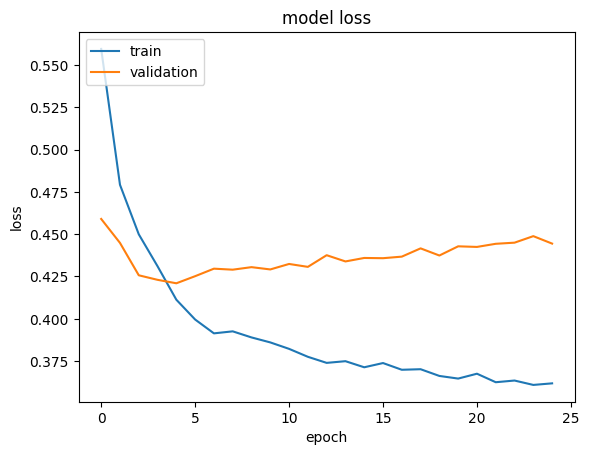

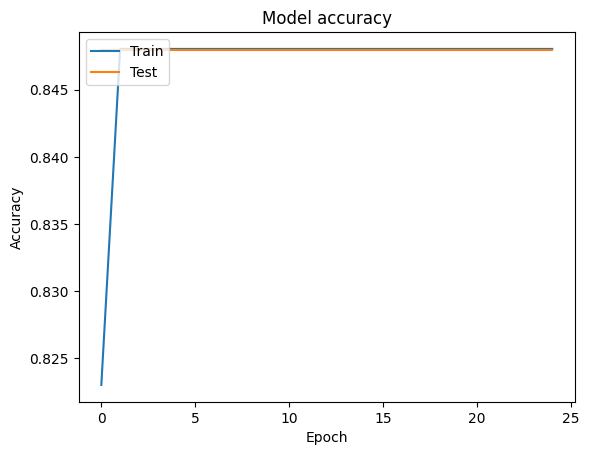

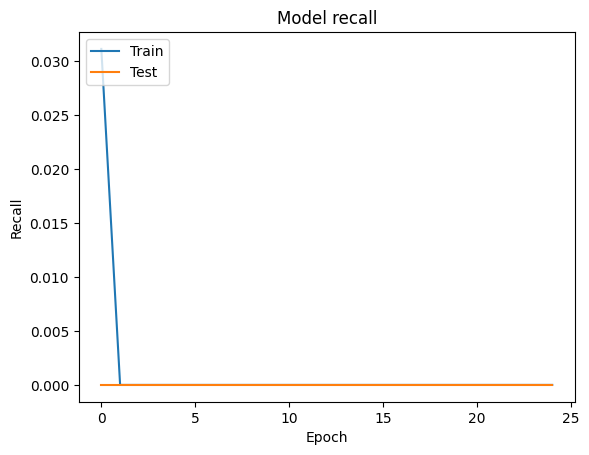

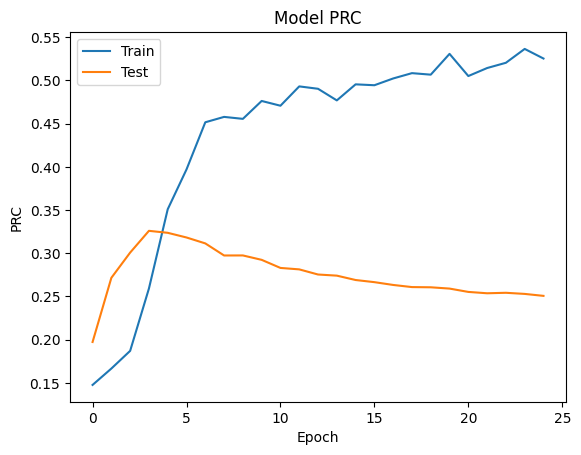

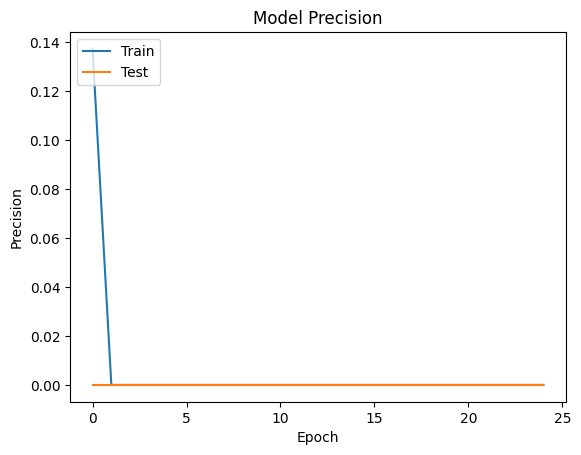

In [22]:
#plot metrics for Mlp model for outbreak after 1 month classification
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Plot training & validation accuracy values
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history1.history['recall'])
plt.plot(history1.history['val_recall'])
plt.title('Model recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history1.history['prc'])
plt.plot(history1.history['val_prc'])
plt.title('Model PRC')
plt.ylabel('PRC')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history1.history['precision'])
plt.plot(history1.history['val_precision'])
plt.title('Model Precision')
plt.ylabel('Precision')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


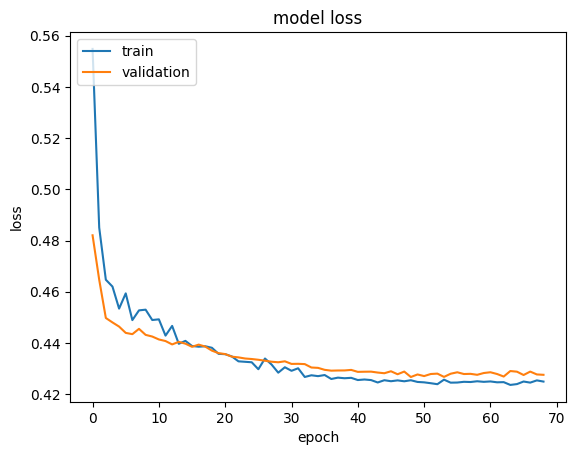

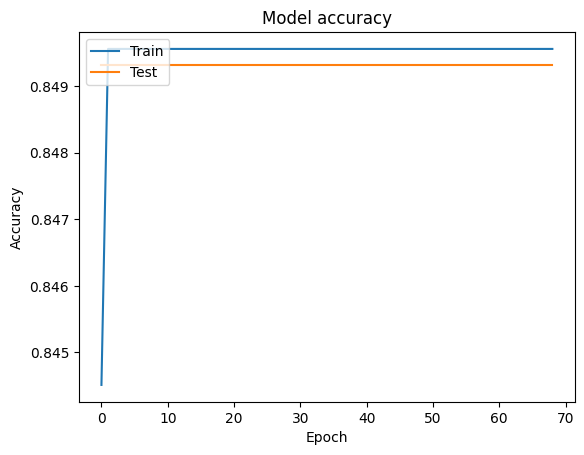

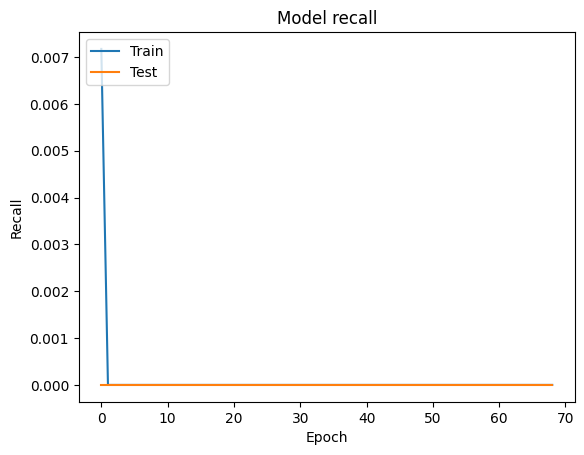

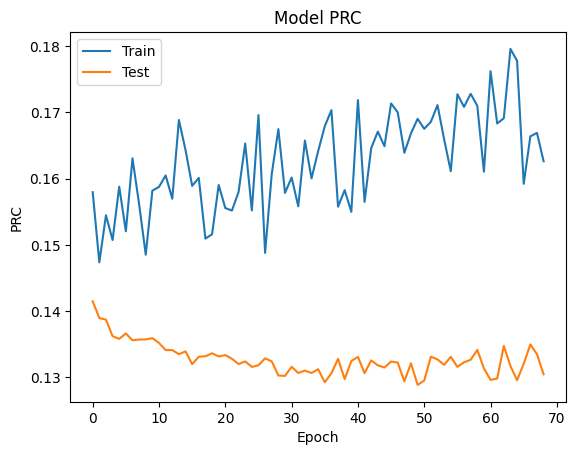

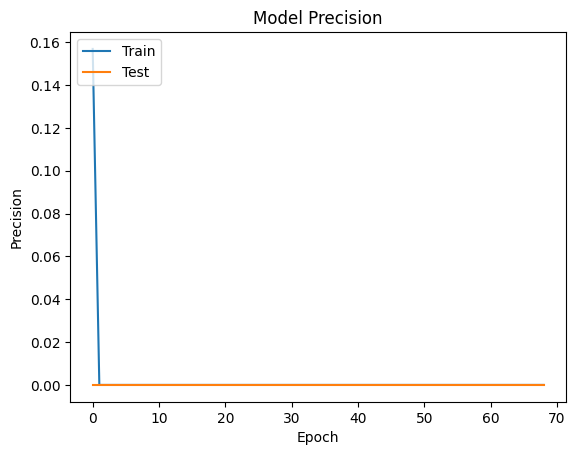

In [23]:
#plot metrics for Mlp model for outbreak after 2 month classification
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Plot training & validation accuracy values
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history2.history['recall'])
plt.plot(history2.history['val_recall'])
plt.title('Model recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history2.history['prc'])
plt.plot(history2.history['val_prc'])
plt.title('Model PRC')
plt.ylabel('PRC')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history2.history['precision'])
plt.plot(history2.history['val_precision'])
plt.title('Model Precision')
plt.ylabel('Precision')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


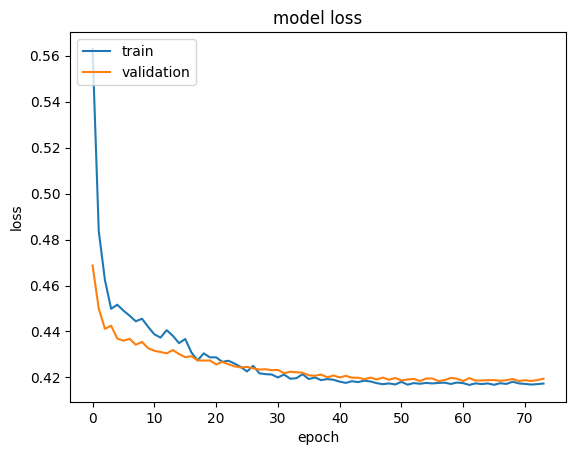

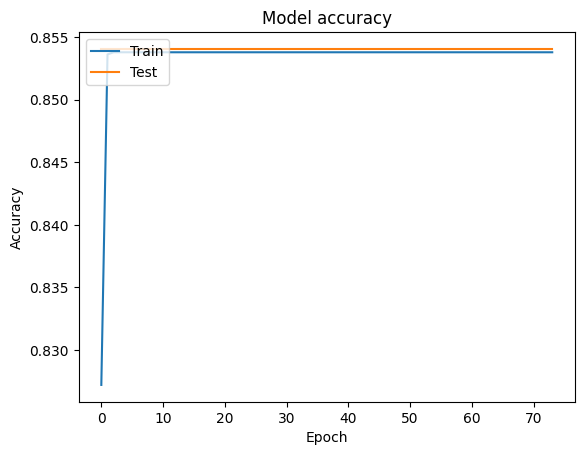

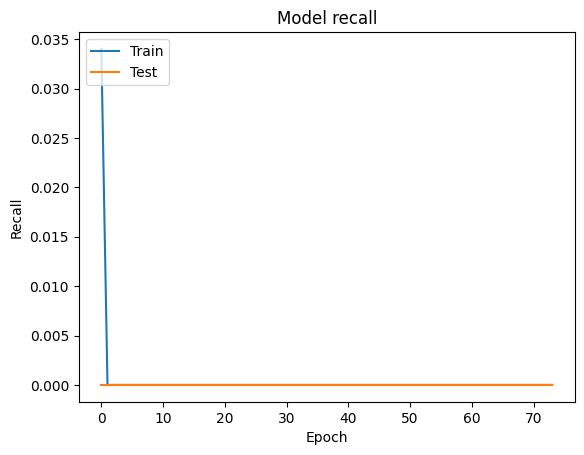

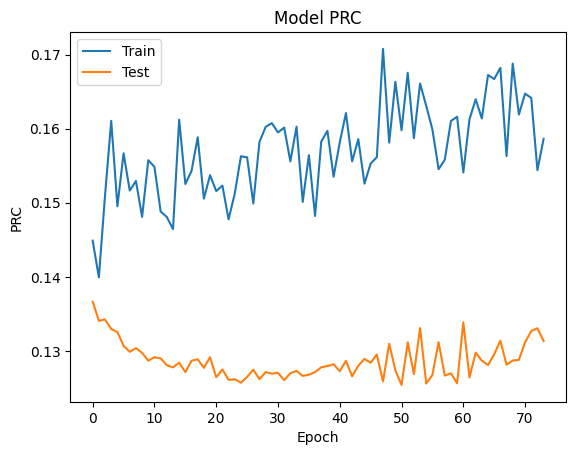

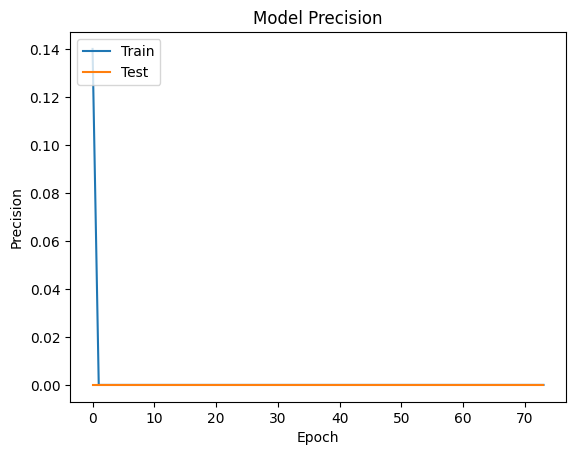

In [24]:
#plot metrics for Mlp model for outbreak after 3 month classification
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Plot training & validation accuracy values
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history3.history['recall'])
plt.plot(history3.history['val_recall'])
plt.title('Model recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history3.history['prc'])
plt.plot(history3.history['val_prc'])
plt.title('Model PRC')
plt.ylabel('PRC')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history3.history['precision'])
plt.plot(history3.history['val_precision'])
plt.title('Model Precision')
plt.ylabel('Precision')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


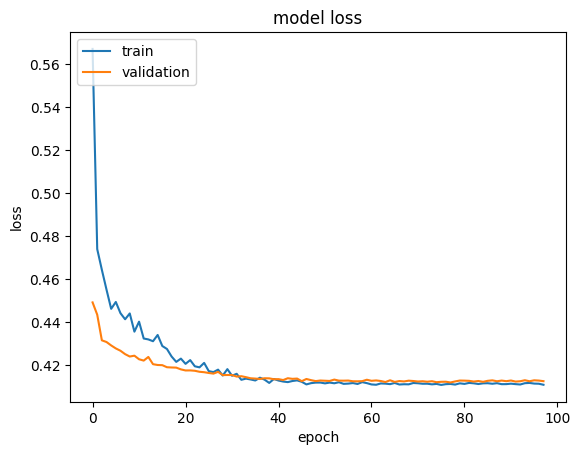

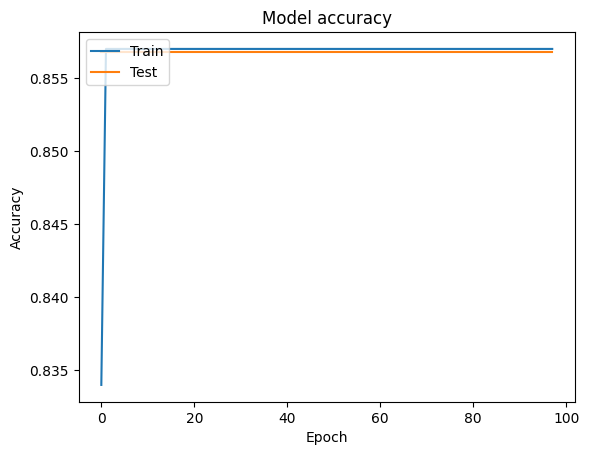

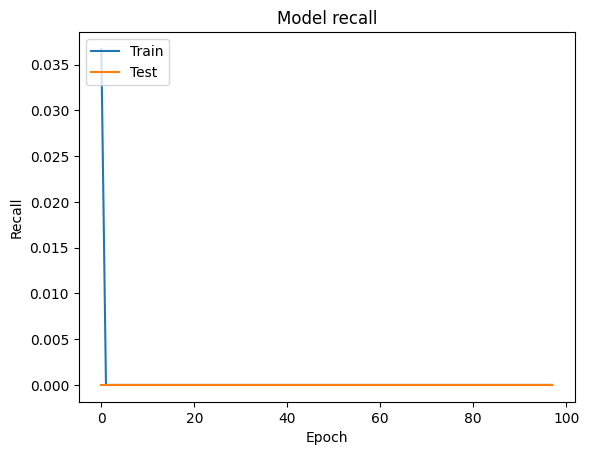

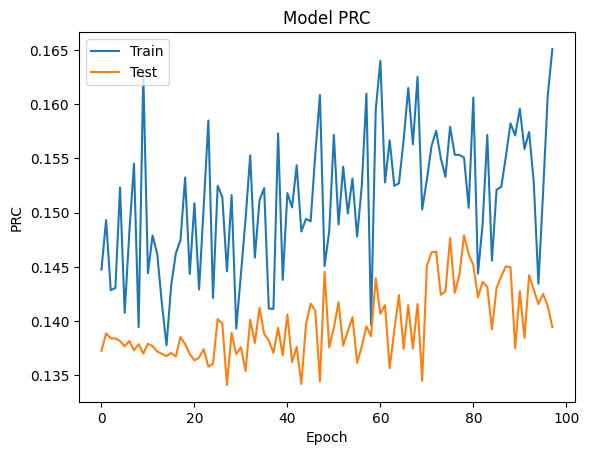

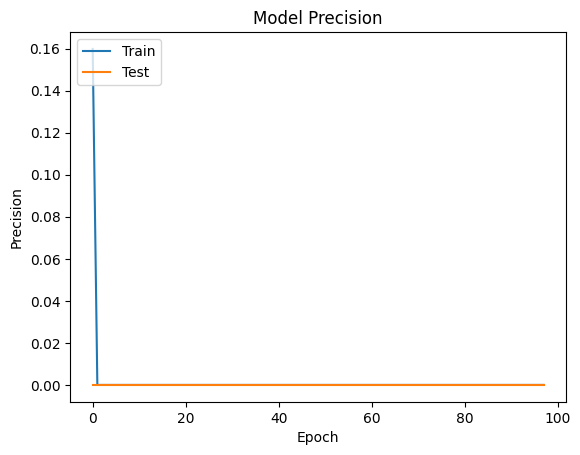

In [25]:
#plot metrics for Mlp model for outbreak after 4 month classification
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Plot training & validation accuracy values
plt.plot(history4.history['accuracy'])
plt.plot(history4.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history4.history['recall'])
plt.plot(history4.history['val_recall'])
plt.title('Model recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history4.history['prc'])
plt.plot(history4.history['val_prc'])
plt.title('Model PRC')
plt.ylabel('PRC')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history4.history['precision'])
plt.plot(history4.history['val_precision'])
plt.title('Model Precision')
plt.ylabel('Precision')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


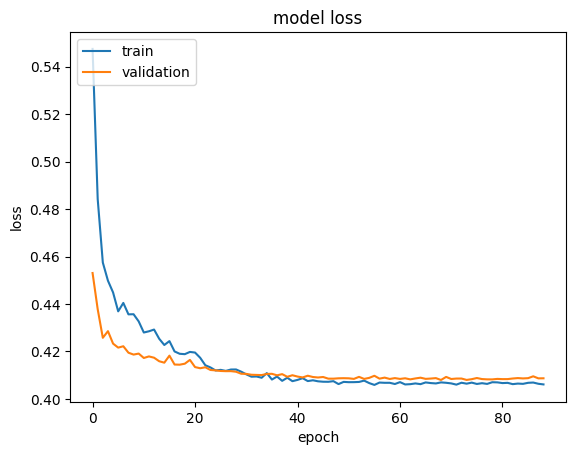

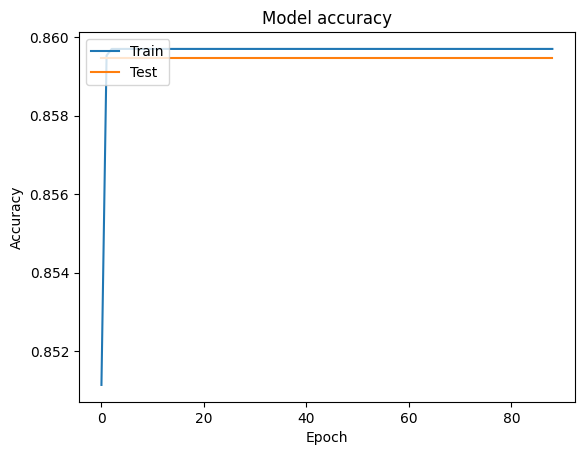

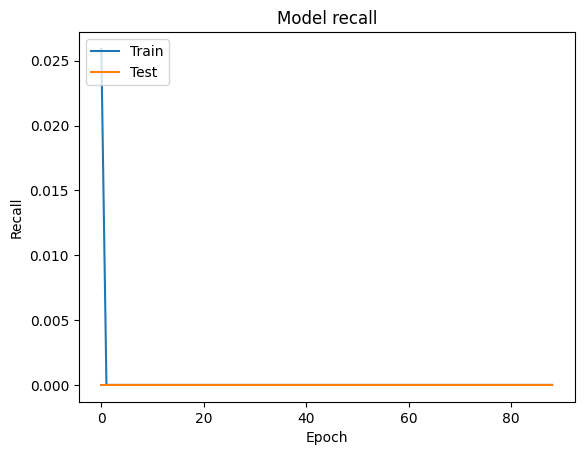

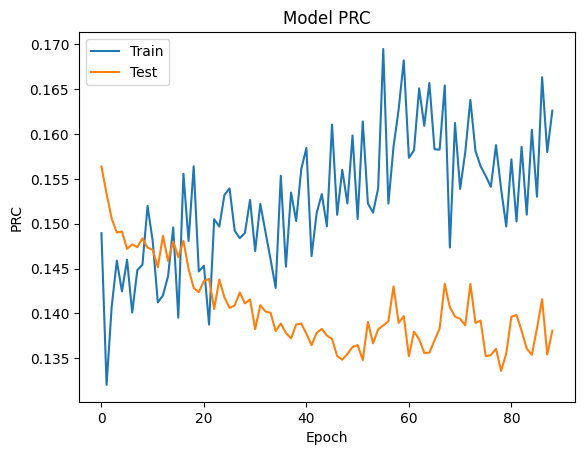

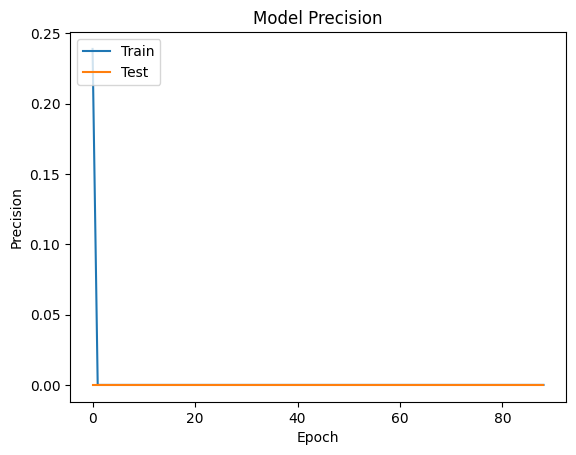

In [26]:
#plot metrics for Mlp model for outbreak after 5 month classification
plt.plot(history5.history['loss'])
plt.plot(history5.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Plot training & validation accuracy values
plt.plot(history5.history['accuracy'])
plt.plot(history5.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history5.history['recall'])
plt.plot(history5.history['val_recall'])
plt.title('Model recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history5.history['prc'])
plt.plot(history5.history['val_prc'])
plt.title('Model PRC')
plt.ylabel('PRC')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history5.history['precision'])
plt.plot(history5.history['val_precision'])
plt.title('Model Precision')
plt.ylabel('Precision')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


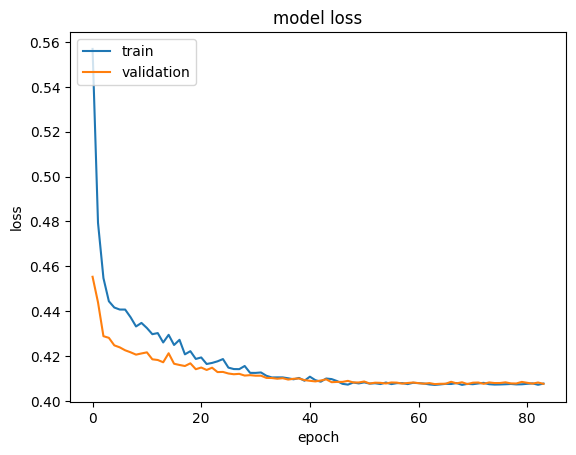

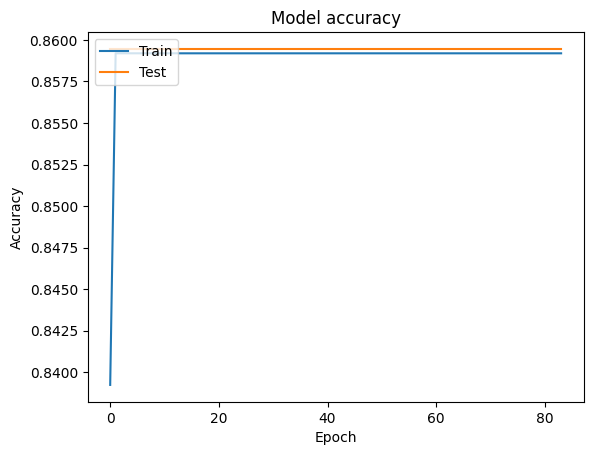

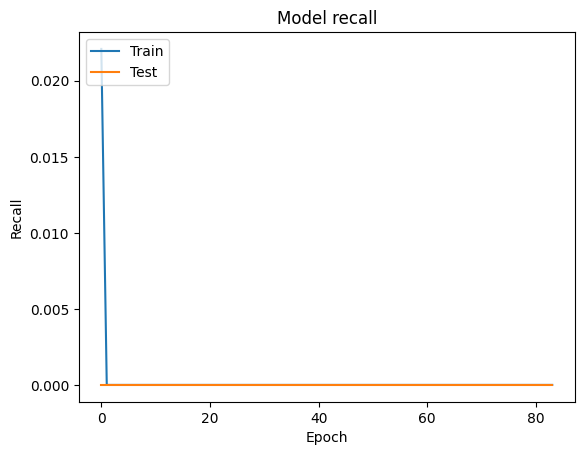

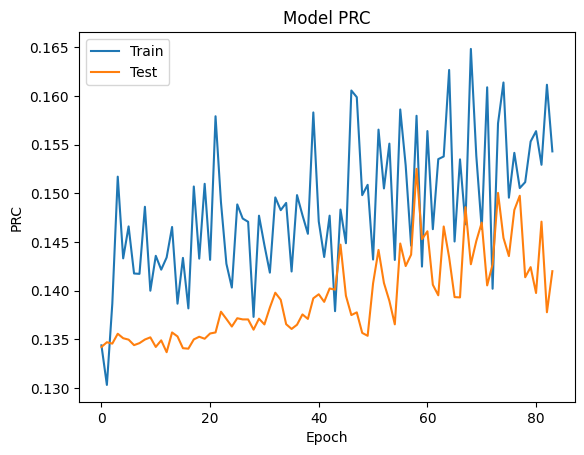

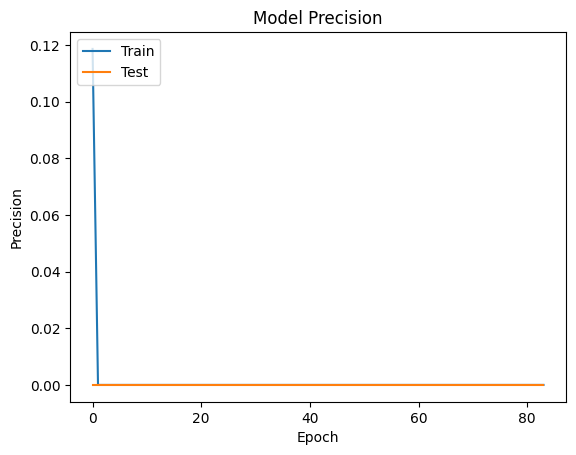

In [27]:
#plot metrics for Mlp model for outbreak after 6 month classification
plt.plot(history6.history['loss'])
plt.plot(history6.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Plot training & validation accuracy values
plt.plot(history6.history['accuracy'])
plt.plot(history6.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history6.history['recall'])
plt.plot(history6.history['val_recall'])
plt.title('Model recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history6.history['prc'])
plt.plot(history6.history['val_prc'])
plt.title('Model PRC')
plt.ylabel('PRC')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history6.history['precision'])
plt.plot(history6.history['val_precision'])
plt.title('Model Precision')
plt.ylabel('Precision')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [28]:
import pickle
from sklearn import svm
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score, precision_score, recall_score, mean_squared_error, roc_curve

Get argmin of FPR+TPR-1 for each MLP to readjust classification threshold

In [29]:
fpr, tpr, thresholds = roc_curve(y1_train,model_MLP_1.predict(x_train_final))

185/185 [==============================] - 0s 984us/step


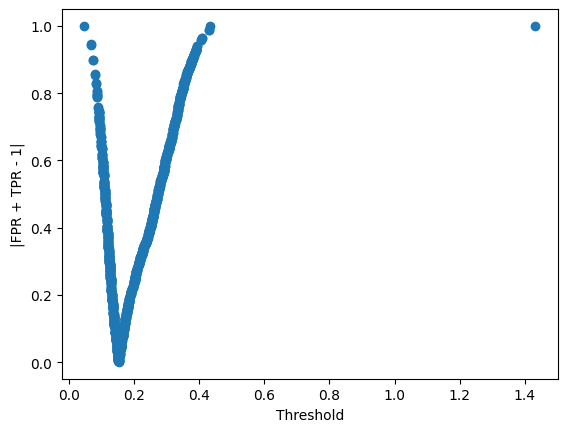

In [30]:
plt.scatter(thresholds,np.abs(fpr+tpr-1))
plt.xlabel("Threshold")
plt.ylabel("|FPR + TPR - 1|")
plt.show()

In [31]:
threshold=thresholds[np.argmin(np.abs(fpr+tpr-1))]

In [ ]:
print(threshold)

In [32]:
MLP_predictions = model_MLP_1.predict(x_test_final)
MLP_predictions_binary = []
for i in MLP_predictions:
    if i > threshold:
        MLP_predictions_binary.append(1)
    else:
        MLP_predictions_binary.append(0)

#Metrics for new threshold
print(accuracy_score(y1_test, MLP_predictions_binary)*100)
print(balanced_accuracy_score(y1_test, MLP_predictions_binary)*100)
print(f1_score(y1_test, MLP_predictions_binary))
print(precision_score(y1_test, MLP_predictions_binary))
print(recall_score(y1_test, MLP_predictions_binary))

47/47 [==============================] - 0s 739us/step
67.77027027027027
65.49358123063303
0.36988110964332893
0.2631578947368421
0.6222222222222222


185/185 [==============================] - 0s 1ms/step


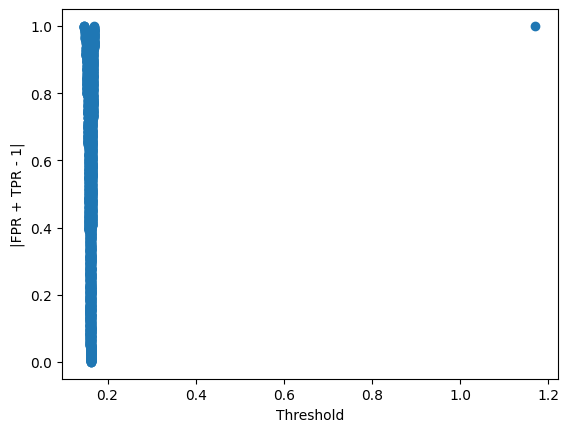

0.16173375
47/47 [==============================] - 0s 891us/step
51.01351351351351
48.10674572171624
0.21281216069489683
0.14040114613180515
0.43946188340807174


In [33]:
fpr, tpr, thresholds = roc_curve(y2_train,model_MLP_2.predict(x_train_final))
plt.scatter(thresholds,np.abs(fpr+tpr-1))
plt.xlabel("Threshold")
plt.ylabel("|FPR + TPR - 1|")
plt.show()
threshold=thresholds[np.argmin(np.abs(fpr+tpr-1))]
print(threshold)
MLP_predictions = model_MLP_2.predict(x_test_final)
MLP_predictions_binary = []
for i in MLP_predictions:
    if i > threshold:
        MLP_predictions_binary.append(1)
    else:
        MLP_predictions_binary.append(0)

#Metrics for new threshold
print(accuracy_score(y2_test, MLP_predictions_binary)*100)
print(balanced_accuracy_score(y2_test, MLP_predictions_binary)*100)
print(f1_score(y2_test, MLP_predictions_binary))
print(precision_score(y2_test, MLP_predictions_binary))
print(recall_score(y2_test, MLP_predictions_binary))

185/185 [==============================] - 0s 984us/step


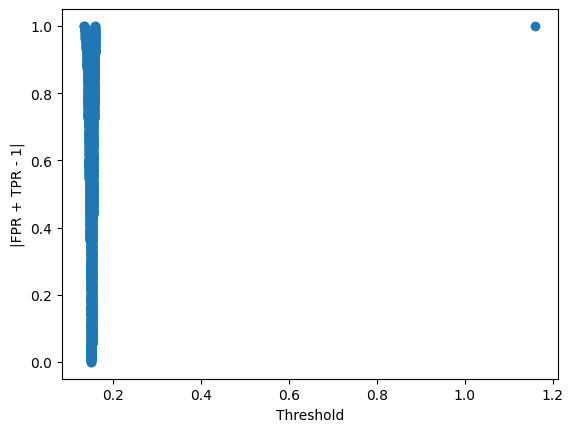

0.15133636
47/47 [==============================] - 0s 913us/step
48.64864864864865
48.441162681669006
0.21487603305785125
0.13829787234042554
0.48148148148148145


In [34]:
fpr, tpr, thresholds = roc_curve(y3_train,model_MLP_3.predict(x_train_final))
plt.scatter(thresholds,np.abs(fpr+tpr-1))
plt.xlabel("Threshold")
plt.ylabel("|FPR + TPR - 1|")
plt.show()
threshold=thresholds[np.argmin(np.abs(fpr+tpr-1))]
print(threshold)
MLP_predictions = model_MLP_3.predict(x_test_final)
MLP_predictions_binary = []
for i in MLP_predictions:
    if i > threshold:
        MLP_predictions_binary.append(1)
    else:
        MLP_predictions_binary.append(0)

#Metrics for new threshold
print(accuracy_score(y3_test, MLP_predictions_binary)*100)
print(balanced_accuracy_score(y3_test, MLP_predictions_binary)*100)
print(f1_score(y3_test, MLP_predictions_binary))
print(precision_score(y3_test, MLP_predictions_binary))
print(recall_score(y3_test, MLP_predictions_binary))

185/185 [==============================] - 0s 1ms/step


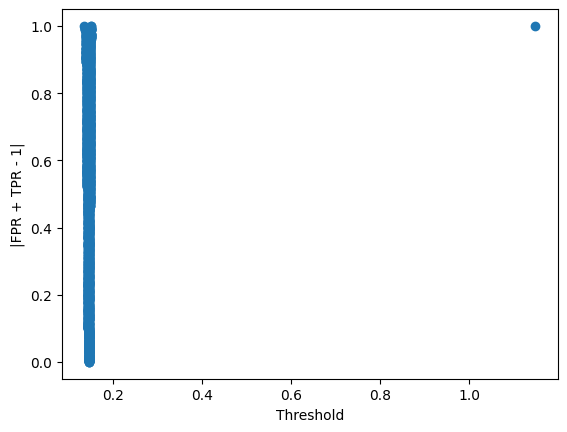

0.14481468
47/47 [==============================] - 0s 804us/step
53.783783783783775
50.04761621332064
0.21739130434782605
0.14350453172205438
0.4481132075471698


In [35]:
fpr, tpr, thresholds = roc_curve(y4_train,model_MLP_4.predict(x_train_final))
plt.scatter(thresholds,np.abs(fpr+tpr-1))
plt.xlabel("Threshold")
plt.ylabel("|FPR + TPR - 1|")
plt.show()
threshold=thresholds[np.argmin(np.abs(fpr+tpr-1))]
print(threshold)
MLP_predictions = model_MLP_4.predict(x_test_final)
MLP_predictions_binary = []
for i in MLP_predictions:
    if i > threshold:
        MLP_predictions_binary.append(1)
    else:
        MLP_predictions_binary.append(0)

#Metrics for new threshold
print(accuracy_score(y4_test, MLP_predictions_binary)*100)
print(balanced_accuracy_score(y4_test, MLP_predictions_binary)*100)
print(f1_score(y4_test, MLP_predictions_binary))
print(precision_score(y4_test, MLP_predictions_binary))
print(recall_score(y4_test, MLP_predictions_binary))

185/185 [==============================] - 0s 924us/step


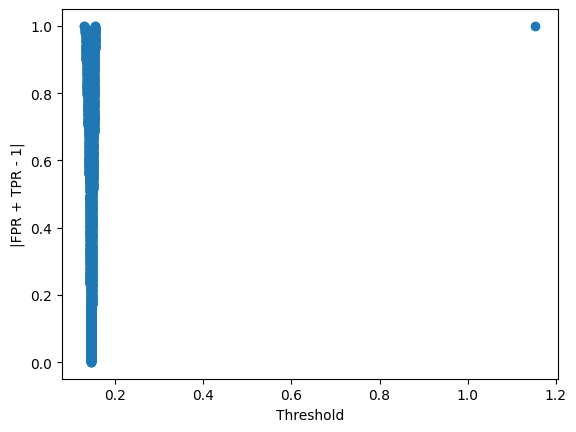

0.14518493
47/47 [==============================] - 0s 978us/step
51.95945945945945
49.33024915336236
0.21087680355160934
0.1370851370851371
0.4567307692307692


In [36]:
fpr, tpr, thresholds = roc_curve(y5_train,model_MLP_5.predict(x_train_final))
plt.scatter(thresholds,np.abs(fpr+tpr-1))
plt.xlabel("Threshold")
plt.ylabel("|FPR + TPR - 1|")
plt.show()
threshold=thresholds[np.argmin(np.abs(fpr+tpr-1))]
print(threshold)
MLP_predictions = model_MLP_5.predict(x_test_final)
MLP_predictions_binary = []
for i in MLP_predictions:
    if i > threshold:
        MLP_predictions_binary.append(1)
    else:
        MLP_predictions_binary.append(0)

#Metrics for new threshold
print(accuracy_score(y5_test, MLP_predictions_binary)*100)
print(balanced_accuracy_score(y5_test, MLP_predictions_binary)*100)
print(f1_score(y5_test, MLP_predictions_binary))
print(precision_score(y5_test, MLP_predictions_binary))
print(recall_score(y5_test, MLP_predictions_binary))

185/185 [==============================] - 0s 832us/step


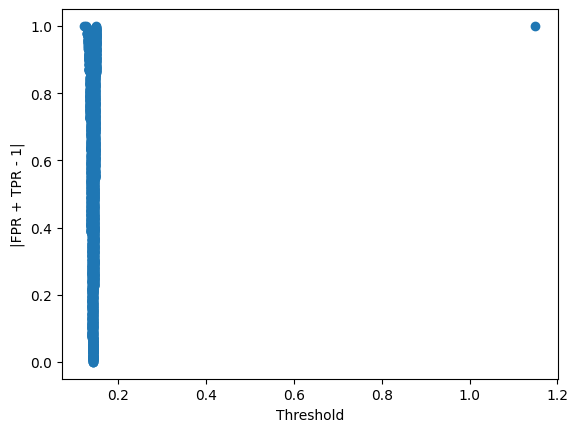

0.14177023
47/47 [==============================] - 0s 1ms/step
54.32432432432432
49.700653120464445
0.21028037383177572
0.1388888888888889
0.4326923076923077


In [37]:
fpr, tpr, thresholds = roc_curve(y6_train,model_MLP_6.predict(x_train_final))
plt.scatter(thresholds,np.abs(fpr+tpr-1))
plt.xlabel("Threshold")
plt.ylabel("|FPR + TPR - 1|")
plt.show()
threshold=thresholds[np.argmin(np.abs(fpr+tpr-1))]
print(threshold)
MLP_predictions = model_MLP_6.predict(x_test_final)
MLP_predictions_binary = []
for i in MLP_predictions:
    if i > threshold:
        MLP_predictions_binary.append(1)
    else:
        MLP_predictions_binary.append(0)

#Metrics for new threshold
print(accuracy_score(y6_test, MLP_predictions_binary)*100)
print(balanced_accuracy_score(y6_test, MLP_predictions_binary)*100)
print(f1_score(y6_test, MLP_predictions_binary))
print(precision_score(y6_test, MLP_predictions_binary))
print(recall_score(y6_test, MLP_predictions_binary))

In [ ]:
#save tuned MLPs
model_MLP_1.save('Saved_Models/MLP_1_month')
model_MLP_2.save('Saved_Models/MLP_2_month')
model_MLP_3.save('Saved_Models/MLP_3_month')
model_MLP_4.save('Saved_Models/MLP_4_month')
model_MLP_5.save('Saved_Models/MLP_5_month')
model_MLP_6.save('Saved_Models/MLP_6_month')

In [38]:
from sklearn.model_selection import GridSearchCV

In [ ]:
#estabilish grid for grid search
param_grid= {'kernel': ('linear', 'rbf', 'poly', 'sigmoid'), 'C': [0.1,1, 10, 100], 'gamma':[10,1,0.1,0.01,0.001, 'scale','auto']}


Find Optimal SVMs for each outbreak prediction model using grid search

In [ ]:
svm1 = svm.SVC()
grid_search = GridSearchCV(svm1,param_grid,scoring='accuracy')
grid_search.fit(x_train_final, y1_train)

print("Best Hyperparams: ", grid_search.best_params_)

In [ ]:
svm2 = svm.SVC()
grid_search = GridSearchCV(svm2,param_grid,scoring='accuracy')
grid_search.fit(x_train_final, y2_train)

print("Best Hyperparams: ", grid_search.best_params_)

In [ ]:
svm3 = svm.SVC()
grid_search = GridSearchCV(svm3,param_grid,scoring='accuracy')
grid_search.fit(x_train_final, y3_train)

print("Best Hyperparams: ", grid_search.best_params_)

In [ ]:
svm4 = svm.SVC()
grid_search = GridSearchCV(svm4,param_grid,scoring='accuracy')
grid_search.fit(x_train_final, y4_train)

print("Best Hyperparams: ", grid_search.best_params_)

In [ ]:
svm5 = svm.SVC()
grid_search = GridSearchCV(svm5,param_grid,scoring='accuracy')
grid_search.fit(x_train_final, y5_train)

print("Best Hyperparams: ", grid_search.best_params_)

In [ ]:
svm6 = svm.SVC()
grid_search = GridSearchCV(svm6,param_grid,scoring='accuracy')
grid_search.fit(x_train_final, y6_train)

print("Best Hyperparams: ", grid_search.best_params_)

In [39]:
#Fit SVMs with previously found optimum parameters
svm1 = svm.SVC(kernel='sigmoid')
svm1.fit(x_train_final, y1_train)
svm2 = svm.SVC(kernel="sigmoid")
svm2.fit(x_train_final, y2_train)
svm3 = svm.SVC(kernel="sigmoid")
svm3.fit(x_train_final, y3_train)
svm4 = svm.SVC(kernel="sigmoid")
svm4.fit(x_train_final, y4_train)
svm5 = svm.SVC(kernel="sigmoid")
svm5.fit(x_train_final, y5_train)
svm6 = svm.SVC(kernel="sigmoid")
svm6.fit(x_train_final, y6_train)


SVC(kernel='sigmoid')

In [40]:
classifier_predictions = svm1.predict(x_test_final)

#Metrics for 1 month SVM
print(accuracy_score(y1_test, classifier_predictions)*100)
print(balanced_accuracy_score(y1_test, classifier_predictions)*100)
print(f1_score(y1_test, classifier_predictions))
print(precision_score(y1_test, classifier_predictions))
print(recall_score(y1_test, classifier_predictions))

77.63513513513513
58.36122177954848
0.29424307036247327
0.2827868852459016
0.30666666666666664


In [41]:
classifier_predictions = svm2.predict(x_test_final)

#Metrics for 2 month SVM
print(accuracy_score(y2_test, classifier_predictions)*100)
print(balanced_accuracy_score(y2_test, classifier_predictions)*100)
print(f1_score(y2_test, classifier_predictions))
print(precision_score(y2_test, classifier_predictions))
print(recall_score(y2_test, classifier_predictions))

76.8918918918919
49.69301953901202
0.12307692307692307
0.1437125748502994
0.10762331838565023


In [42]:
classifier_predictions = svm3.predict(x_test_final)

#Metrics for 1 month SVM
print(accuracy_score(y3_test, classifier_predictions)*100)
print(balanced_accuracy_score(y3_test, classifier_predictions)*100)
print(f1_score(y3_test, classifier_predictions))
print(precision_score(y3_test, classifier_predictions))
print(recall_score(y3_test, classifier_predictions))

77.97297297297298
49.10337552742617
0.0994475138121547
0.1232876712328767
0.08333333333333333


In [43]:
classifier_predictions = svm4.predict(x_test_final)

#Metrics for 1 month SVM
print(accuracy_score(y4_test, classifier_predictions)*100)
print(balanced_accuracy_score(y4_test, classifier_predictions)*100)
print(f1_score(y4_test, classifier_predictions))
print(precision_score(y4_test, classifier_predictions))
print(recall_score(y4_test, classifier_predictions))

79.5945945945946
50.37944169989882
0.11695906432748539
0.15384615384615385
0.09433962264150944


In [44]:
classifier_predictions = svm5.predict(x_test_final)

#Metrics for 1 month SVM
print(accuracy_score(y5_test, classifier_predictions)*100)
print(balanced_accuracy_score(y5_test, classifier_predictions)*100)
print(f1_score(y5_test, classifier_predictions))
print(precision_score(y5_test, classifier_predictions))
print(recall_score(y5_test, classifier_predictions))

79.32432432432432
49.96825108853411
0.11046511627906976
0.13970588235294118
0.09134615384615384


In [45]:
classifier_predictions = svm6.predict(x_test_final)

#Metrics for 1 month SVM
print(accuracy_score(y6_test, classifier_predictions)*100)
print(balanced_accuracy_score(y6_test, classifier_predictions)*100)
print(f1_score(y6_test, classifier_predictions))
print(precision_score(y6_test, classifier_predictions))
print(recall_score(y6_test, classifier_predictions))

80.06756756756756
50.199564586357035
0.10876132930513595
0.14634146341463414
0.08653846153846154


In [ ]:
#save optimised SVMs
pickle.dump(svm1, open('Saved_models/svm_1.sav','wb'))
pickle.dump(svm2, open('Saved_models/svm_2.sav','wb'))
pickle.dump(svm3, open('Saved_models/svm_3.sav','wb'))
pickle.dump(svm4, open('Saved_models/svm_4.sav','wb'))
pickle.dump(svm5, open('Saved_models/svm_5.sav','wb'))
pickle.dump(svm6, open('Saved_models/svm_6.sav','wb'))

In [46]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf1 = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf2 = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf3 = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf4 = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf5 = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf6 = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf1.fit(x_train_final, y1_train)
rf2.fit(x_train_final, y2_train)
rf3.fit(x_train_final, y3_train)
rf4.fit(x_train_final, y4_train)
rf5.fit(x_train_final, y5_train)
rf6.fit(x_train_final, y6_train)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [47]:
rf_predictions = rf1.predict(x_test_final)
rf_predictions_binary = []
for i in rf_predictions:
    if i > 0.5:#set classification based on threshold
        rf_predictions_binary.append(1)
    else:
        rf_predictions_binary.append(0)

#Metrics for 1 month RF
print(accuracy_score(y1_test, rf_predictions_binary)*100)
print(balanced_accuracy_score(y1_test, rf_predictions_binary)*100)
print(f1_score(y1_test, rf_predictions_binary))
print(precision_score(y1_test, rf_predictions_binary)*100)
print(recall_score(y1_test, rf_predictions_binary)*100)


75.27027027027027
50.03629924745463
0.14485981308411214
15.270935960591133
13.777777777777779


In [48]:
rf_predictions = rf2.predict(x_test_final)
rf_predictions_binary = []
for i in rf_predictions:
    if i > 0.5:#set classification based on threshold
        rf_predictions_binary.append(1)
    else:
        rf_predictions_binary.append(0)

#Metrics for 2 months RF
print(accuracy_score(y2_test, rf_predictions_binary)*100)
print(balanced_accuracy_score(y2_test, rf_predictions_binary)*100)
print(f1_score(y2_test, rf_predictions_binary))
print(precision_score(y2_test, rf_predictions_binary)*100)
print(recall_score(y2_test, rf_predictions_binary)*100)

84.18918918918918
50.48464027455219
0.040983606557377046
23.809523809523807
2.242152466367713


In [49]:
rf_predictions = rf3.predict(x_test_final)
rf_predictions_binary = []
for i in rf_predictions:
    if i > 0.5:#set classification based on threshold
        rf_predictions_binary.append(1)
    else:
        rf_predictions_binary.append(0)

#Metrics for 3 month RF
print(accuracy_score(y3_test, rf_predictions_binary)*100)
print(balanced_accuracy_score(y3_test, rf_predictions_binary)*100)
print(f1_score(y3_test, rf_predictions_binary))
print(precision_score(y3_test, rf_predictions_binary)*100)
print(recall_score(y3_test, rf_predictions_binary)*100)

84.39189189189189
50.17434364744492
0.03347280334728033
17.391304347826086
1.8518518518518516


In [50]:
rf_predictions = rf4.predict(x_test_final)
rf_predictions_binary = []
for i in rf_predictions:
    if i > 0.5:#set classification based on threshold
        rf_predictions_binary.append(1)
    else:
        rf_predictions_binary.append(0)

#Metrics for 4 month RF
print(accuracy_score(y4_test, rf_predictions_binary)*100)
print(balanced_accuracy_score(y4_test, rf_predictions_binary)*100)
print(f1_score(y4_test, rf_predictions_binary))
print(precision_score(y4_test, rf_predictions_binary)*100)
print(recall_score(y4_test, rf_predictions_binary)*100)

85.4054054054054
50.038688173323024
0.009174311926605505
16.666666666666664
0.4716981132075472


In [51]:
rf_predictions = rf5.predict(x_test_final)
rf_predictions_binary = []
for i in rf_predictions:
    if i > 0.5:#set classification based on threshold
        rf_predictions_binary.append(1)
    else:
        rf_predictions_binary.append(0)

#Metrics for 5 month RF
print(accuracy_score(y5_test, rf_predictions_binary)*100)
print(balanced_accuracy_score(y5_test, rf_predictions_binary)*100)
print(f1_score(y5_test, rf_predictions_binary))
print(precision_score(y5_test, rf_predictions_binary)*100)
print(recall_score(y5_test, rf_predictions_binary)*100)

85.06756756756756
49.69007014997581
0.008968609865470852
6.666666666666667
0.4807692307692308


In [52]:
rf_predictions = rf6.predict(x_test_final)
rf_predictions_binary = []
for i in rf_predictions:
    if i > 0.5:#set classification based on threshold
        rf_predictions_binary.append(1)
    else:
        rf_predictions_binary.append(0)

#Metrics for 6 month RF
print(accuracy_score(y6_test, rf_predictions_binary)*100)
print(balanced_accuracy_score(y6_test, rf_predictions_binary)*100)
print(f1_score(y6_test, rf_predictions_binary))
print(precision_score(y6_test, rf_predictions_binary)*100)
print(recall_score(y6_test, rf_predictions_binary)*100)

85.74324324324324
50.0831519109821
0.009389671361502348
20.0
0.4807692307692308


In [ ]:
#Save Random forest models
pickle.dump(rf1, open('Saved_models/rf_1.sav','wb'))
pickle.dump(rf2, open('Saved_models/rf_2.sav','wb'))
pickle.dump(rf3, open('Saved_models/rf_3.sav','wb'))
pickle.dump(rf4, open('Saved_models/rf_4.sav','wb'))
pickle.dump(rf5, open('Saved_models/rf_5.sav','wb'))
pickle.dump(rf6, open('Saved_models/rf_6.sav','wb'))

In [53]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen
from statsmodels.tsa.vector_ar.var_model import VAR
from statsmodels.tsa.stattools import adfuller
import math 
import statsmodels.api as sm

In [ ]:
#ADF test for whether features are stationary for VAR model (retired due to retirement of VAR model)
def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)
    for key,val in result[4].items():
        out[f'critical value ({key})']=val
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [ ]:
for datafile in datafiles:
    df = pd.read_excel(datafile)
    print(df['province'][0])
    df = df.drop(['province'], axis=1)
    for i in df.columns:
        print(i)
        adf_test(df[i])

In [ ]:
#run ADF test on features (Retired)
'''
for datafile in datafiles:
    df = pd.read_excel(datafile)
    print(df['province'][0])
    df = df.drop(['province'], axis=1)
    df = df.drop(['year_month'], axis=1)
    df_difference = df.diff()
    #columns = ['Influenza_cases','Diarrhoea_cases','Total_Evaporation','Average_Humidity','Influenza_rates','Diarrhoea_rates']
    for i in df_difference.columns:
        print(i)
        adf_test(df_difference[i])
'''

Function to build VAR model (retired due to poor RMSE results compared to SARIMA)

In [ ]:
def predict_for_province(t, province):
        df_johan = pd.read_excel('Fulldata/'+province+'.xlsx')
        df_johan['Date_Time'] = pd.to_datetime(df_johan.year_month , format = '%Y/%m/%d')
        data = df_johan.drop(['Date_Time', 'year_month'], axis=1)
        data.index = df_johan.Date_Time
        data = data.drop(['province'], axis = 1)
        #data = data.drop(['province', 'Influenza_cases', 'Diarrhoea_cases','Total_Evaporation','Average_Humidity','Influenza_rates','Diarrhoea_rates'],axis=1)
        data = data.fillna(0)
        data_difference = data.diff()
        data_difference = data_difference.fillna(0)
        cols = data_difference.columns
        
        test_obs=12
        train = data_difference[:-test_obs]
        valid = data_difference[-test_obs:]


        model = VAR(endog=train, freq='MS')
        model_VAR = model.fit(12)

        prediction_VAR = model_VAR.forecast(train.values[-model_VAR.k_ar:], steps=len(valid))

        #converting predictions to dataframe
        pred = pd.DataFrame(data=prediction_VAR,index=range(0,len(prediction_VAR)),columns=[cols])


        #check rmse
        for i in cols:
            print('rmse value for', i, 'is : ', math.sqrt(mean_squared_error(pred[i], valid[i])))

        model = VAR(endog=data_difference, freq='MS')
        final_VAR_model = model.fit(12)
        lag = final_VAR_model.k_ar
        forecast = final_VAR_model.forecast(data_difference.values[-lag:], steps = t)
        df_forecast = pd.DataFrame(data = forecast, index = range(0,len(forecast)), columns = [cols])
        for i in cols:
            df_forecast[i] = df[i].iloc[-1] + df_forecast[i].cumsum()
        print(province)
        return df_forecast

In [54]:
from pylab import rcParams
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import itertools

In [ ]:
#live function for adf test to determine whether feature is stationary
def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    print (dfoutput['p-value'])
    return dfoutput

In [ ]:
#funtion to build SARIMA for a selected province and disease
def predict_disease_for_province(province, disease):
        #load and process data for selected disease and province
        print(province)
        dataset = pd.read_excel('Fulldata/'+province+'.xlsx')
        ts_province = dataset[['year_month',disease+'_cases']]#drop any features that aren't selected disease cases
        ts_province['year_month'] = pd.to_datetime(ts_province['year_month'])
        ts_province = ts_province.dropna()
        ts_province = ts_province.set_index('year_month')#index dataframe with year-month
        ts_province.plot()
        rcParams['figure.figsize'] = 18, 8
        decomposition = sm.tsa.seasonal_decompose(ts_province, model='additive')
        fig = decomposition.plot()#plot decomposition information of data
        plt.show()
        adf_test_results = adf_test(ts_province)#test whether feature is stationary

        ts_s_adj = ts_province 
        ts_s_adj = ts_s_adj.dropna()#remove any null data
        plot_acf(ts_s_adj)#plot acf
        plt.show()
        plot_pacf(ts_s_adj)
        plt.show()#plot pacf
        
        #set possible range for non-seasonal SARIMA variables
        p = range(0,3)
        d = range(0,2)
        q = range(0,3)
        #set possible Seasonal SARIMA variables
        pdq = list(itertools.product(p,d,q))
        seasonal_pdq = [(x[0],x[1],x[2],12) for x in list(itertools.product(p,d,q))]
        print('Examples of parameter combinations for Seasonal ARIMA...')
        print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
        print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
        print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
        print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))
        aic_list = []
        order_list = []
        s_order_list = []
        #grid search with loop to determine the best combination of SARIMA variables 
        for param in pdq:
                for param_seasonal in seasonal_pdq:
                        try:
                                mod = sm.tsa.statespace.SARIMAX(ts_s_adj, order=param, seasonal_order=param_seasonal, enforce_stationarity=False, enforce_invertibility=False)
                                results = mod.fit()
                                #print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
                                aic_list.append(results.aic)
                                order_list.append(param)
                                s_order_list.append(param_seasonal)
                        except:
                                continue
        results_df = pd.DataFrame({'aic': aic_list, 'order': order_list, 'seasonal_order': s_order_list})
        best_option = results_df[results_df.aic == results_df.aic.min()]
        best_option = best_option.reset_index()
        mod = sm.tsa.statespace.SARIMAX(ts_s_adj, order = best_option['order'][0], seasonal_order = best_option['seasonal_order'][0])#best option chosen
        results = mod.fit(method = 'powell')#best option fit
        print(results.summary().tables[1])

        results.plot_diagnostics(figsize=(18,8))
        plt.show()

        #results of best option are plot to visualise prediction on test set
        pred = results.get_prediction(start=pd.to_datetime('2014-01-01'), dynamic=False)
        pred_ci = pred.conf_int()
        ax = ts_s_adj.plot(label='observed')
        pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 4))
        ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='k', alpha=.2)
        ax.set_xlabel('Date')
        ax.set_ylabel(disease+'_cases')
        plt.legend()
        plt.show()

        y_forecasted = pred.predicted_mean
        y_truth = ts_s_adj['2014-01-01':]
        mse = ((y_forecasted - y_truth) ** 2).mean()
        #print('The Mean Squared Error is {}'.format(round(mse, 2)))
        #print('The Root Mean Squared Error is {}'.format(round(np.sqrt(mse), 2)))
        
        #plot future prediction to visualise it 
        future_forecast = results.get_prediction(start=pd.to_datetime('2014-01-01'), end=pd.to_datetime('2019-12-01'), dynamic=False)
        future_forceast_ci = future_forecast.conf_int()
        ax = ts_s_adj.plot(label='observed')
        future_forecast.predicted_mean.plot(ax=ax, label = 'future forecast', alpha=.7, figsize=(14,4))
        ax.set_xlabel('Date')
        ax.set_ylabel(disease+'_cases')
        plt.legend()
        plt.show()

        #save the best SARIMA model
        results.save('Saved_models/'+province+'_'+disease+'_SARIMA_Model.pickle')

In [ ]:
#parse all provinces to SARIMA function to find the best one for each for dengue prediction
for datafile in datafiles:
    province = datafile.split("\\")
    province = province[1].split(".")
    predict_disease_for_province(province[0], 'Dengue_fever')


In [ ]:
#parse all provinces to SARIMA function to find the best one for each for diarrhoea prediction
for datafile in datafiles:
    province = datafile.split("\\")
    province = province[1].split(".")
    predict_disease_for_province(province[0], 'Diarrhoea')

In [ ]:
#parse all provinces to SARIMA function to find the best one for each for influenza prediction
for datafile in datafiles:
    province = datafile.split("\\")
    province = province[1].split(".")
    predict_disease_for_province(province[0], 'Influenza')

In [55]:
#load previously save MLP, RF and SVM model for 1 month
model_mlp = keras.models.load_model('Saved_Models/MLP_1_month/')
model_rf = pickle.load(open('Saved_Models/rf_1.sav', 'rb'))
model_svm = pickle.load(open('Saved_Models/svm_1.sav', 'rb'))

In [56]:
MLP_predictions = model_mlp.predict(x_test_final)
MLP_predictions_binary = []
for i in MLP_predictions:
    if i > 0.15678541:
        MLP_predictions_binary.append(1)
    else:
        MLP_predictions_binary.append(0)

47/47 [==============================] - 0s 1ms/step
60.2027027027027
48.721063390305765
0.19645293315143247
0.1411764705882353
0.32286995515695066


In [57]:
rf_predictions = model_rf.predict(x_test_final)
rf_predictions_binary = []
for i in rf_predictions:
    if i > 0.5:
        rf_predictions_binary.append(1)
    else:
        rf_predictions_binary.append(0)

75.8108108108108
50.90096357260329
0.15962441314553988
0.16748768472906403
0.15246636771300448


In [58]:
classifier_predictions = model_svm.predict(x_test_final)

73.3108108108108
49.79808141671215
0.15417558886509639
0.14754098360655737
0.16143497757847533


In [59]:
#function to weight model predictions for ensemble
def classification_weighting(pred, acc, f1):
    weighted_pred = []
    for i in pred:
        if i == 0:
            weighted_pred.append(-(acc*f1))#weight prediction with product of accuracy and f1
        else:
            weighted_pred.append(acc*f1)
    return weighted_pred

In [60]:
#weight predictions
svm_wegihted_pred = classification_weighting(classifier_predictions,balanced_accuracy_score(y1_test, classifier_predictions),f1_score(y1_test, classifier_predictions))
rf_weighted_pred = classification_weighting(rf_predictions_binary,balanced_accuracy_score(y1_test, rf_predictions_binary),f1_score(y1_test, rf_predictions_binary))
mlp_weighted_pred = classification_weighting(MLP_predictions_binary,balanced_accuracy_score(y1_test, MLP_predictions_binary),f1_score(y1_test, MLP_predictions_binary))

In [61]:
ensemble_pred = []
#ensemble prediction
if len(svm_wegihted_pred)==len(rf_weighted_pred) and len(svm_wegihted_pred)==len(mlp_weighted_pred):
    for i in range(len(svm_wegihted_pred)):
        weighted_prediction=rf_weighted_pred[i]+svm_wegihted_pred[i]+mlp_weighted_pred[i]#add each weighted prediction
        if weighted_prediction>0:#above 0 is positve case
            ensemble_pred.append(1)
        else:#below 0 is negative case
            ensemble_pred.append(0)

In [62]:
#Output metrics for ensemble model
print(accuracy_score(y1_test, ensemble_pred)*100)
print(balanced_accuracy_score(y1_test, ensemble_pred)*100)
print(f1_score(y1_test, ensemble_pred))
print(precision_score(y1_test, ensemble_pred))
print(recall_score(y1_test, ensemble_pred))

77.0945945945946
58.58964143426295
0.2981366459627329
0.27906976744186046
0.32


In [ ]:
model_mlp = keras.models.load_model('Saved_Models/MLP_2_month/')
model_rf = pickle.load(open('Saved_Models/rf_2.sav', 'rb'))
model_svm = pickle.load(open('Saved_Models/svm_2.sav', 'rb'))

In [65]:
from statsmodels.iolib.smpickle import load_pickle

In [ ]:
model_Sarima = load_pickle("Saved_Models/An Giang_Dengue_Fever_SARIMA_Model.pickle")
    

prediction = model_Sarima.get_prediction(start=pd.to_datetime('2017-01-01'), end=pd.to_datetime('2019-01-01'), dynamic=False)
pp = prediction.predicted_mean
pp.values

In [110]:
RMSEs = []
NRMSEs = []
for datafile in datafiles:
    dataset = pd.read_excel(datafile)
    ts_province = dataset[['year_month','Dengue_fever_cases']]#drop any features that aren't selected disease cases
    ts_province['year_month'] = pd.to_datetime(ts_province['year_month'])
    ts_province = ts_province.dropna()
    ts_province = ts_province.set_index('year_month')
    province = datafile.split("\\")
    province = province[1].split(".")
    model_Sarima = load_pickle("Saved_Models/"+province[0]+"_Dengue_Fever_SARIMA_Model.pickle")
    prediction = model_Sarima.get_prediction(start=pd.to_datetime('2014-01-01'),  dynamic=False)
    y_forecasted = prediction.predicted_mean
    y_truth = ts_province['2014-01-01':]
    mse = ((y_forecasted - y_truth['Dengue_fever_cases']) ** 2).mean()
    RMSEs.append(np.sqrt(mse))
    NRMSEs.append(np.sqrt(mse)/(y_truth['Dengue_fever_cases'].max() - y_truth['Dengue_fever_cases'].min()))

filtered_NRMSEs = [v for v in NRMSEs if not (math.isinf(v) or math.isnan(v))]

total1 = 0
for i in RMSEs:
    total1 = total1 + i 
total2 = 0
for i in filtered_NRMSEs:
    total2 = total2 + i

print(total1/len(RMSEs))
print(total2/len(filtered_NRMSEs))

C:\Users\Charlie\AppData\Local\Temp\ipykernel_199548\613681920.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts_province['year_month'] = pd.to_datetime(ts_province['year_month'])
C:\Users\Charlie\AppData\Local\Temp\ipykernel_199548\613681920.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts_province['year_month'] = pd.to_datetime(ts_province['year_month'])
C:\Users\Charlie\AppData\Local\Temp\ipykernel_199548\613681920.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

77.02452597364683
0.4984652002085781


In [108]:
RMSEs = []
NRMSEs = []
for datafile in datafiles:
    dataset = pd.read_excel(datafile)
    ts_province = dataset[['year_month','Influenza_cases']]#drop any features that aren't selected disease cases
    ts_province['year_month'] = pd.to_datetime(ts_province['year_month'])
    ts_province = ts_province.dropna()
    ts_province = ts_province.set_index('year_month')
    province = datafile.split("\\")
    province = province[1].split(".")
    model_Sarima = load_pickle("Saved_Models/"+province[0]+"_Influenza_SARIMA_Model.pickle")
    prediction = model_Sarima.get_prediction(start=pd.to_datetime('2014-01-01'),  dynamic=False)
    y_forecasted = prediction.predicted_mean
    y_truth = ts_province['2014-01-01':]
    mse = ((y_forecasted - y_truth['Influenza_cases']) ** 2).mean()
    RMSEs.append(np.sqrt(mse))
    NRMSEs.append(np.sqrt(mse)/(y_truth['Influenza_cases'].max() - y_truth['Influenza_cases'].min()))

filtered_NRMSEs = [v for v in NRMSEs if not (math.isinf(v) or math.isnan(v))]

total1 = 0
for i in RMSEs:
    total1 = total1 + i 
total2 = 0
for i in filtered_NRMSEs:
    total2 = total2 + i

print(total1/len(RMSEs))
print(total2/len(filtered_NRMSEs))

C:\Users\Charlie\AppData\Local\Temp\ipykernel_199548\254542742.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts_province['year_month'] = pd.to_datetime(ts_province['year_month'])
C:\Users\Charlie\AppData\Local\Temp\ipykernel_199548\254542742.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts_province['year_month'] = pd.to_datetime(ts_province['year_month'])
C:\Users\Charlie\AppData\Local\Temp\ipykernel_199548\254542742.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

373.6707994522356
0.2905748662982378


C:\Users\Charlie\AppData\Local\Temp\ipykernel_199548\254542742.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts_province['year_month'] = pd.to_datetime(ts_province['year_month'])
C:\Users\Charlie\AppData\Local\Temp\ipykernel_199548\254542742.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts_province['year_month'] = pd.to_datetime(ts_province['year_month'])


In [109]:
RMSEs = []
NRMSEs = []
for datafile in datafiles:
    dataset = pd.read_excel(datafile)
    ts_province = dataset[['year_month','Diarrhoea_cases']]#drop any features that aren't selected disease cases
    ts_province['year_month'] = pd.to_datetime(ts_province['year_month'])
    ts_province = ts_province.dropna()
    ts_province = ts_province.set_index('year_month')
    province = datafile.split("\\")
    province = province[1].split(".")
    model_Sarima = load_pickle("Saved_Models/"+province[0]+"_Diarrhoea_SARIMA_Model.pickle")
    prediction = model_Sarima.get_prediction(start=pd.to_datetime('2014-01-01'),  dynamic=False)
    y_forecasted = prediction.predicted_mean
    y_truth = ts_province['2014-01-01':]
    mse = ((y_forecasted - y_truth['Diarrhoea_cases']) ** 2).mean()
    RMSEs.append(np.sqrt(mse))
    NRMSEs.append(np.sqrt(mse)/(y_truth['Diarrhoea_cases'].max() - y_truth['Diarrhoea_cases'].min()))

filtered_NRMSEs = [v for v in NRMSEs if not (math.isinf(v) or math.isnan(v))]

total1 = 0
for i in RMSEs:
    total1 = total1 + i 
total2 = 0
for i in filtered_NRMSEs:
    total2 = total2 + i

print(total1/len(RMSEs))
print(total2/len(filtered_NRMSEs))

C:\Users\Charlie\AppData\Local\Temp\ipykernel_199548\2458200584.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts_province['year_month'] = pd.to_datetime(ts_province['year_month'])
C:\Users\Charlie\AppData\Local\Temp\ipykernel_199548\2458200584.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts_province['year_month'] = pd.to_datetime(ts_province['year_month'])
C:\Users\Charlie\AppData\Local\Temp\ipykernel_199548\2458200584.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

165.49252410573308
0.22879644822876308
